In [1]:
# import the required packages

# tabular data
import pandas as pd
import numpy as np 
from tabulate import tabulate

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# metrics 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score

# classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

# regression models 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

# statistical models 
import statsmodels.api as sm

# model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve


# time - test
import time

# math 
from math import sqrt

## 1. HR Analytics

### 1.1 Load and Sample the data

In [2]:
df_hr = pd.read_csv('./hr_csv_transformed.csv')

In [3]:
df_hr.head()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_R&D,department_Procurement,department_Finance,department_HR,department_Legal,gender_f,gender_m,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred
0,6108,1,2.0,-0.103865,0.0,-0.503161,0,0,-0.12,0,...,0,0,0,0,0,0,1,0,1,0
1,785,1,1.0,-0.677333,-2.0,-0.225465,0,0,1.04,0,...,0,0,0,0,0,0,1,0,1,0
2,1234,2,0.0,-0.321705,1.0,-0.864038,1,0,-0.44,0,...,0,0,0,0,0,0,1,0,1,0
3,6108,1,0.0,-0.436134,1.0,-0.864038,0,0,-0.08,0,...,0,0,1,0,0,0,1,1,0,0
4,1701,2,0.0,0.732668,-2.0,0.740418,0,0,-0.20,0,...,0,0,0,0,0,1,0,1,0,0


In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092 entries, 0 to 9091
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region                        9092 non-null   int64  
 1   education                     9092 non-null   int64  
 2   no_of_trainings               9092 non-null   float64
 3   age                           9092 non-null   float64
 4   previous_year_rating          9092 non-null   float64
 5   length_of_service             9092 non-null   float64
 6   KPIs_met >80%                 9092 non-null   int64  
 7   awards_won?                   9092 non-null   int64  
 8   avg_training_score            9092 non-null   float64
 9   is_promoted                   9092 non-null   int64  
 10  department_Sales & Marketing  9092 non-null   int64  
 11  department_Operations         9092 non-null   int64  
 12  department_Technology         9092 non-null   int64  
 13  dep

In [5]:
df_hr.describe()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_R&D,department_Procurement,department_Finance,department_HR,department_Legal,gender_f,gender_m,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred
count,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,...,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000
mean,4584.995381,1.290805,0.231522,0.107887,0.583150,-0.043580,0.512868,0.064452,0.283836,0.500000,...,0.015178,0.140013,0.044435,0.036846,0.017268,0.315662,0.684338,0.429059,0.545535,0.025407
std,4079.802512,0.483942,0.559087,0.671022,1.182599,0.699312,0.499862,0.245570,0.579979,0.500027,...,0.122268,0.347020,0.206070,0.188393,0.130275,0.464805,0.464805,0.494969,0.497950,0.157366
min,31.000000,0.000000,0.000000,-1.690290,-2.000000,-1.378193,0.000000,0.000000,-0.760000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1234.000000,1.000000,0.000000,-0.436134,0.000000,-0.503161,0.000000,0.000000,-0.240000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2617.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.160000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,6108.000000,2.000000,0.000000,0.476189,2.000000,0.496839,1.000000,0.000000,0.810000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,11497.000000,2.000000,7.000000,2.017907,2.000000,2.115994,1.000000,1.000000,1.560000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_hr.isnull().sum()

region                          0
education                       0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
department_Sales & Marketing    0
department_Operations           0
department_Technology           0
department_Analytics            0
department_R&D                  0
department_Procurement          0
department_Finance              0
department_HR                   0
department_Legal                0
gender_f                        0
gender_m                        0
recruitment_channel_sourcing    0
recruitment_channel_other       0
recruitment_channel_referred    0
dtype: int64

In [7]:
# inspect the target class distribution 
df_hr['is_promoted'].value_counts()

0    4546
1    4546
Name: is_promoted, dtype: int64

In [8]:
columns_to_keep = ['region', 'education', 'no_of_trainings', 'age',
                   'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
                   'awards_won?', 'avg_training_score', 'is_promoted']

# Drop columns after 'is_promoted'
df_hr = df_hr[columns_to_keep]

In [9]:
df_hr

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,6108,1,2.0,-0.103865,0.0,-0.503161,0,0,-0.12,0
1,785,1,1.0,-0.677333,-2.0,-0.225465,0,0,1.04,0
2,1234,2,0.0,-0.321705,1.0,-0.864038,1,0,-0.44,0
3,6108,1,0.0,-0.436134,1.0,-0.864038,0,0,-0.08,0
4,1701,2,0.0,0.732668,-2.0,0.740418,0,0,-0.20,0
...,...,...,...,...,...,...,...,...,...,...
9087,2617,1,0.0,-0.211028,0.0,-1.378193,1,0,-0.16,1
9088,4624,2,0.0,1.662279,1.0,0.353160,0,0,0.84,1
9089,2592,1,0.0,-0.321705,1.0,-0.864038,1,0,1.04,1
9090,804,1,0.0,1.961178,0.0,0.845561,0,0,0.20,1


### 1.1.1 Train and Test Split

In [10]:
X = df_hr.drop(['is_promoted'], axis =1)
y = df_hr['is_promoted']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1.2 Build the Model(s)

- building baseline models, then 2 models will be chosen to focus on 

In [12]:
models = []

model_names = []

### Logisitic Regression

In [13]:
# no hyperparams except random state for consistency in results 
lg = LogisticRegression(random_state=42).fit(X_train, y_train)

models.append(lg)
model_names.append("Logistic Regression")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Classifier 

In [14]:
dtree = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

models.append(dtree)
model_names.append("Decision Tree")

### Random Forest Classifier 

In [15]:
rf = RandomForestClassifier(random_state=42).fit(X_train,y_train)

models.append(rf)
model_names.append("Random Forest")

### Support Vector Classifier 

In [16]:
svc = SVC(random_state = 42).fit(X_train,y_train)

models.append(svc)
model_names.append("SVC")

### MLP Classifier 

In [17]:
mlp = MLPClassifier(random_state = 42).fit(X_train, y_train)

models.append(mlp)
model_names.append("Multi Layer Perceptron")

### ADA Boost 

In [18]:
ada = AdaBoostClassifier(random_state = 42).fit(X_train,y_train)

models.append(ada)
model_names.append("ADA")

### XG Boost 

In [19]:
xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)

models.append(xgb)
model_names.append("XGB")

### 1.3 Evaluate and Improve the Model(s)

In [20]:
def model_scores_classification(model):
    print(f"Model: {model}")
    
    train_pred = model.predict(X_train)
    print(f'\nTraining score: {model.score(X_train, y_train)}')

    test_pred = model.predict(X_test)
    print(f'Testing score: {model.score(X_test, y_test)}')
    
    print('\nTest Report:')
    print(classification_report(y_test, test_pred))
    
    cm = confusion_matrix(y_test, test_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Testing')
    plt.show()

### 1.3.1 Consolidated View of Baseline Model Accuracies 

In [21]:
scores_table = []
for model, name in zip(models, model_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores

# we just see how models perform differently 

,Model,Train Score,Test Score
0,Logistic Regression,0.722344,0.708578
1,Decision Tree,0.998272,0.680352
2,Random Forest,0.998272,0.743402
3,SVC,0.533941,0.537023
4,Multi Layer Perceptron,0.597423,0.574780
5,ADA,0.723602,0.704179
6,XGB,0.883250,0.741569


### 1.3.2 Choosing Models 
These models will be chosen for further evaluation : <mark>Logistic Regression (Simple Model)</mark>, <mark>Multi Layer Perceptron (Artificial Neural Network)</mark>,<mark>ADA Boost (Ensemble Model)</mark>.

### 1.3.2.1 Statistical Models 
- use statistical models to evaluate coeffients and understanding relationships between features 

In [22]:
# using logit
lgsm = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.551050
         Iterations 7


In [23]:
lgsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6364
Model:                          Logit   Df Residuals:                     6355
Method:                           MLE   Df Model:                            8
Date:                Sat, 27 Jan 2024   Pseudo R-squ.:                  0.2050
Time:                        22:41:53   Log-Likelihood:                -3506.9
converged:                       True   LL-Null:                       -4411.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
region               -3.262e-05   6.84e-06     -4.770      0.000    -4.6e-05   -1.92e-05
education               -0.7480      0.038    -19.435      0.000      -0.823      -0.673
no_of_trainings         -0.2390      0.054     -4.424      0.000      -0.345      -0.133
age                      0.0600      0.059      1.011      0.312      -0.056       0.176
previous_year_rating     0.3161      0.026     12.075      0.000       0.265       0.367
length_of_service        0.1675      0.054      3.111      0.002       0.062       0.273
KPIs_met >80%            1.3683      0.060     22.900      0.000       1.251       1.485
awards_won?              2.1232      0.187     11.348      0.000       1.757       2.490
avg_training_score       1.1122      0.054     20.468      0.000       1.006       1.219
========================================================================================
"""

### 1.3.3 Evaluate Chosen Models

### Logistic Regression 

Model: LogisticRegression(random_state=42)

Training score: 0.7223444374607165
Testing score: 0.7085777126099707

Test Report:
              precision    recall  f1-score   support

           0       0.72      0.69      0.71      1389
           1       0.69      0.73      0.71      1339

    accuracy                           0.71      2728
   macro avg       0.71      0.71      0.71      2728
weighted avg       0.71      0.71      0.71      2728



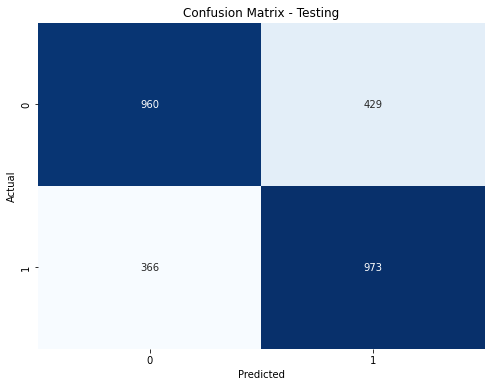

In [24]:
model_scores_classification(lg)

# both train and tests do not have significant differences - it is neither overfitting nor underfitting
# model accuracy can still be improved 

### Multilayer Perceptron 

Model: MLPClassifier(random_state=42)

Training score: 0.5974230043997486
Testing score: 0.5747800586510264

Test Report:
              precision    recall  f1-score   support

           0       0.90      0.19      0.31      1389
           1       0.54      0.98      0.69      1339

    accuracy                           0.57      2728
   macro avg       0.72      0.58      0.50      2728
weighted avg       0.72      0.57      0.50      2728



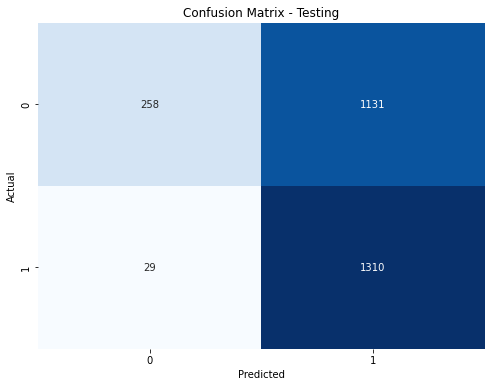

In [25]:
model_scores_classification(mlp)

# model accuracy can be improved
# not much difference between train and test - neither overfitting or underfit 

### ADA Boost 
- currently no base estimators added into the boosting model

Model: AdaBoostClassifier(random_state=42)

Training score: 0.7236015084852294
Testing score: 0.7041788856304986

Test Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1389
           1       0.71      0.68      0.69      1339

    accuracy                           0.70      2728
   macro avg       0.70      0.70      0.70      2728
weighted avg       0.70      0.70      0.70      2728



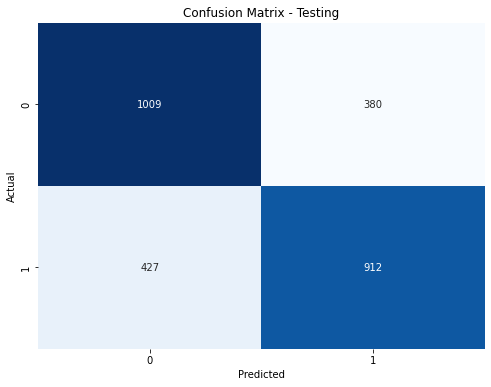

In [26]:
model_scores_classification(ada)

# higher scores than the other models 
# base estimators (the previous models can be added)
# # might be lightly overfitted, there is higher bias against the variance  

### 1.3.4 Model Improvements 

### Logistic Regression 
Hyperparameters that can be tweaked : 
- <mark>C</mark>  : regularisation parameter, higher C may lead to overfiting and lower C may lead to underfitting 
- <mark>penalty</mark> : regularisation term to prevent overfitting 
- <mark>solver</mark> : choice of solver 
- <mark>max_iter</mark> : number of iterations for the solver to converge, low iterations can lead to underfit

### C vs. accuracies 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

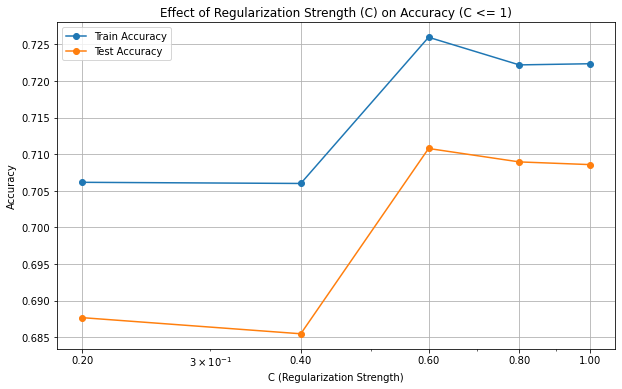

Highest Train Accuracy: 0.726 at C = 0.6
Highest Test Accuracy: 0.711 at C = 0.6


In [27]:
# Assuming you have X_train, X_test, y_train, and y_test
# Replace these with your actual training and testing data

# Define a range of values for C
C_values = [0.2, 0.4, 0.6, 0.8, 1]

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different values of C
for C_val in C_values:
    # Train a logistic regression model
    lg = LogisticRegression(C=C_val, random_state=42).fit(X_train, y_train)

    # Predict on the training and testing sets
    y_train_pred = lg.predict(X_train)
    y_test_pred = lg.predict(X_test)

    # Calculate accuracy and store in lists
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_accuracies, label='Train Accuracy', marker='o')
plt.semilogx(C_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Effect of Regularization Strength (C) on Accuracy (C <= 1)')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Accuracy')
plt.xticks(C_values, [f"{val:.2f}" for val in C_values])  # Set x-axis ticks to actual values
plt.legend()
plt.grid(True)
plt.show()

# Find the index of the maximum train accuracy
max_train_accuracy_index = train_accuracies.index(max(train_accuracies))
# Find the corresponding C value for the maximum train accuracy
max_train_accuracy_C = C_values[max_train_accuracy_index]

# Find the index of the maximum test accuracy
max_test_accuracy_index = test_accuracies.index(max(test_accuracies))
# Find the corresponding C value for the maximum test accuracy
max_test_accuracy_C = C_values[max_test_accuracy_index]

# Print the results
print(f'Highest Train Accuracy: {max(train_accuracies):.3f} at C = {max_train_accuracy_C}')
print(f'Highest Test Accuracy: {max(test_accuracies):.3f} at C = {max_test_accuracy_C}')

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

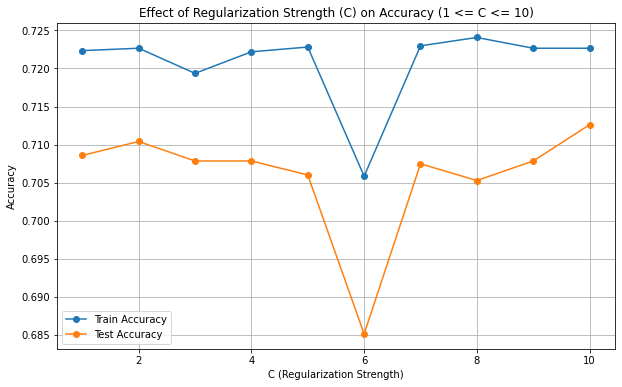

Highest Train Accuracy: 0.724 at C = 8
Highest Test Accuracy: 0.713 at C = 10


In [28]:
# Define a range of values for C from 1 to 10
C_values = list(range(1, 11))

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different values of C
for C_val in C_values:
    # Train a logistic regression model
    lg = LogisticRegression(C=C_val, random_state=42).fit(X_train, y_train)

    # Predict on the training and testing sets
    y_train_pred = lg.predict(X_train)
    y_test_pred = lg.predict(X_test)

    # Calculate accuracy and store in lists
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Effect of Regularization Strength (C) on Accuracy (1 <= C <= 10)')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Find the index of the maximum train accuracy
max_train_accuracy_index = train_accuracies.index(max(train_accuracies))
# Find the corresponding C value for the maximum train accuracy
max_train_accuracy_C = C_values[max_train_accuracy_index]

# Find the index of the maximum test accuracy
max_test_accuracy_index = test_accuracies.index(max(test_accuracies))
# Find the corresponding C value for the maximum test accuracy
max_test_accuracy_C = C_values[max_test_accuracy_index]

# Print the results
print(f'Highest Train Accuracy: {max(train_accuracies):.3f} at C = {max_train_accuracy_C}')
print(f'Highest Test Accuracy: {max(test_accuracies):.3f} at C = {max_test_accuracy_C}')


### max_iter vs. accuracies 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


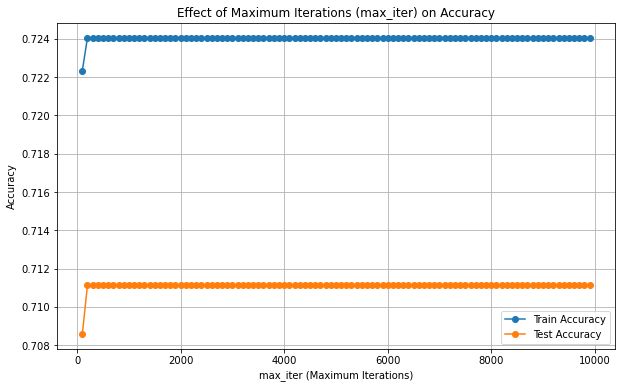

In [29]:
# Define a range of values for max_iter
max_iter_values = np.arange(100, 10000, 100)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different values of max_iter
for max_iter_val in max_iter_values:
    # Train a logistic regression model
    lg = LogisticRegression(max_iter=max_iter_val, random_state=42).fit(X_train, y_train)

    # Predict on the training and testing sets
    y_train_pred = lg.predict(X_train)
    y_test_pred = lg.predict(X_test)

    # Calculate accuracy and store in lists
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(max_iter_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Effect of Maximum Iterations (max_iter) on Accuracy')
plt.xlabel('max_iter (Maximum Iterations)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# important to note that this is subject to different solvers as well 
# the accuracy tends to plateau after 500 iterations 

### Hyperparameter Tuning using GridSearchCV 
- uses cross validation 
- goes through different combinations of parameters 
- from the seeing how the model performs based on individual parameters, it can be used as a gauge on what to values to input

### 1st iteration 

In [30]:
param_grid = {'penalty' : ['l1','l2','elasticnet'], # type of penalty? 
              'C' : [0.2,0.5,0.8,1], # lower C - underfit, higher C - overfit 
              'solver' : ['lbfgs','saga','sag','liblinear','newton-cg','newton-cholesky'], # different solvers 
              'max_iter' : [400,500,600]} # using the range where it was optimal but we want lower 

In [31]:
start_time = time.time()

grid = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.2s
[CV 1/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.705 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.723 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.717 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.732 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.548 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.568 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.584 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.573 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.544 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.557 total time=   0.1s
[CV 1/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.704 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.725 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cg;, score=0.703 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l2, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.529 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.3s
[CV 1/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.705 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.723 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.717 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.732 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.529 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.581 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.595 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.586 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.568 total time=   0.2s
[CV 1/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.704 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.725 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cg;, score=0.703 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=500, penalty=l2, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.562 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.566 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.538 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   0.4s
[CV 1/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.705 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.723 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.717 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.732 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.562 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.566 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.538 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.550 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.597 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.603 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.600 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.556 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.581 total time=   0.3s
[CV 1/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.704 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.725 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.730 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cg;, score=0.703 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cg;, score=0.723 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=600, penalty=l2, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.2s
[CV 1/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.716 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.730 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.548 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.568 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.584 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.573 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.544 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.557 total time=   0.1s
[CV 1/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.723 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.1s
[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=400, penalty=l2, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.529 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.3s
[CV 1/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.716 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.730 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.529 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.581 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.595 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.586 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.568 total time=   0.2s
[CV 1/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.723 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.1s
[CV 2/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=500, penalty=l2, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.562 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.566 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.538 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   0.4s
[CV 1/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.716 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.730 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.562 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.566 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.538 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.550 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.597 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.603 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.600 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.556 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.581 total time=   0.2s
[CV 1/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.723 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.1s
[CV 2/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=600, penalty=l2, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.2s
[CV 1/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.717 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.729 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.548 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.568 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.584 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.573 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.544 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.557 total time=   0.1s
[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.529 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.3s
[CV 1/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.717 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.729 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.529 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.581 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.595 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.586 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.568 total time=   0.2s
[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.1s
[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.1s
[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.1s
[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.562 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.566 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.538 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   0.4s
[CV 1/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.717 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.729 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.562 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.566 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.538 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.550 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.597 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.603 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.600 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.556 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.581 total time=   0.5s
[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.1s
[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.1s
[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.538 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.523 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.2s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.548 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.568 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.584 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.573 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.544 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.557 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.729 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, pena

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.529 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.3s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.529 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.581 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.595 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.586 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.568 total time=   0.2s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.729 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.1s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, pena

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.562 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.566 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.538 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   0.4s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.562 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.566 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.538 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.550 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.597 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.603 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.600 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.556 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.581 total time=   0.3s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.729 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.1s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, pena

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
660 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Value

In [32]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7218742434797216
{'C': 0.2, 'max_iter': 400, 'penalty': 'l2', 'solver': 'lbfgs'}
Elapsed Time: 01:17


In [33]:
# improved model from GS - lg2 
lg2 = LogisticRegression(C = 0.8,max_iter=400,penalty='l1',solver='liblinear',random_state=42).fit(X_train,y_train)

Model: LogisticRegression(C=0.8, max_iter=400, penalty='l1', random_state=42,
                   solver='liblinear')

Training score: 0.7192017598994344
Testing score: 0.7118768328445748

Test Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1389
           1       0.70      0.72      0.71      1339

    accuracy                           0.71      2728
   macro avg       0.71      0.71      0.71      2728
weighted avg       0.71      0.71      0.71      2728



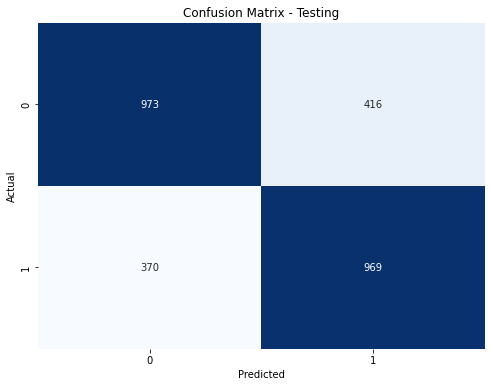

In [34]:
# evaluate 
model_scores_classification(lg2)
# can see that the model score increased but it overfit

### 2nd iteration - higher C range 

In [35]:
param_grid = {'penalty' : ['l1','l2','elasticnet'], # type of penalty? 
              'C' : [1,3,5,7,9], # lower C - underfit, higher C - overfit 
              'solver' : ['lbfgs','saga','sag','liblinear','newton-cg','newton-cholesky'], # different solvers 
              'max_iter' : [400,500,600]} # we want to achieve a model that can perform well at lower iterations 

In [36]:
start_time = time.time()

grid = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.538 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.2s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.548 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.568 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.584 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.573 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.544 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.557 total time=   0.1s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.729 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.1s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, pena

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.529 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.3s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.529 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.581 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.595 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.586 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.568 total time=   0.2s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.729 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.1s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.1s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.1s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, pena

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.562 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.566 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.538 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   0.4s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.562 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.566 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.538 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.550 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.597 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.603 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.600 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.556 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.581 total time=   0.3s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.701 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.729 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.1s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, pena

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.2s
[CV 1/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.728 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.548 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.568 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.584 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.573 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.544 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.557 total time=   0.1s
[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.726 total time=   0.0s
[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.703 total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, sco

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.529 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.3s
[CV 1/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.728 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.529 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.581 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.595 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.586 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.568 total time=   0.2s
[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.726 total time=   0.0s
[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.703 total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, sco

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.562 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.566 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.538 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   0.5s
[CV 1/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.728 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.562 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.566 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.538 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.550 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.597 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.603 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.600 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.556 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.581 total time=   0.3s
[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.726 total time=   0.0s
[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.703 total time=   0.1s
[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.0s
[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, sco

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.548 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.553 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.523 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.3s
[CV 1/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.728 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.548 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.568 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.584 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.573 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.544 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.557 total time=   0.1s
[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.703 total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.0s
[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=400, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.529 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.3s
[CV 1/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.728 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.529 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.581 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.595 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.586 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.568 total time=   0.2s
[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.703 total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.1s
[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=500, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.562 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.566 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.538 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   0.4s
[CV 1/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.728 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.562 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.566 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.538 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.550 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.597 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.603 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.600 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.556 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.581 total time=   0.4s
[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.703 total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.721 total time=   0.1s
[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.727 total time=   0.1s
[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=600, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.548 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.2s
[CV 1/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.728 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.548 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.568 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.584 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.573 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.544 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.557 total time=   0.1s
[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, sco

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.529 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.3s
[CV 1/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.728 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.529 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.581 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.595 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.586 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.568 total time=   0.2s
[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.1s
[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, sco

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.562 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.566 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.538 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   0.4s
[CV 1/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.728 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.562 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.566 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.538 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.550 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.597 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.603 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.600 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.556 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.581 total time=   0.3s
[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.0s
[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, sco

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.548 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.546 total time=   0.2s
[CV 1/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.728 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.538 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.548 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.553 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.523 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.546 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.568 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.584 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.573 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.544 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.557 total time=   0.1s
[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.1s
[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.1s
[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, sco

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.559 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.529 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.3s
[CV 1/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.728 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.551 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.559 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.529 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.581 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.595 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.586 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.549 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.568 total time=   0.2s
[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.1s
[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.1s
[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, sco

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.562 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.566 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.538 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.550 total time=   0.5s
[CV 1/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.702 total time=   0.0s
[CV 2/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.721 total time=   0.0s
[CV 4/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.719 total time=   0.0s
[CV 5/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.728 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.562 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.566 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.538 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.550 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.597 total time=   0.3s
[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.603 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.600 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.556 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.581 total time=   0.3s
[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.703 total time=   0.0s
[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.719 total time=   0.0s
[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.720 total time=   0.0s
[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.727 total time=   0.0s
[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.702 total time=   0.1s
[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.1s
[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.720 total time=   0.1s
[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.719 total time=   0.0s
[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, sco

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
825 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Value

In [37]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.7196757029154129
{'C': 1, 'max_iter': 400, 'penalty': 'l2', 'solver': 'lbfgs'}
Elapsed Time: 01:39


In [38]:
lg3 = LogisticRegression(C=7,max_iter=400,penalty='l2',solver='liblinear').fit(X_train,y_train)

Model: LogisticRegression(C=7, max_iter=400, solver='liblinear')

Training score: 0.718887492143306
Testing score: 0.7118768328445748

Test Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1389
           1       0.70      0.72      0.71      1339

    accuracy                           0.71      2728
   macro avg       0.71      0.71      0.71      2728
weighted avg       0.71      0.71      0.71      2728



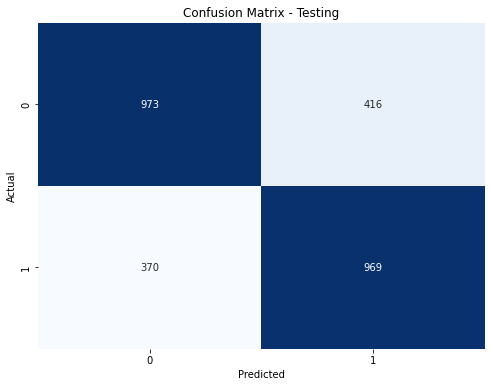

In [39]:
model_scores_classification(lg3)
# similar to model scores but the scores are overfit 

### Multilayer Perceptron
Parameters that can be tweaked: (however, what is the case when some params are specific to another? like solvers, e.g. solver = 'adam, epsilon only applies to that solver?)
- <mark>hidden_layer_sizes</mark> : number of neurons in the hidden layer 
- <mark>activation</mark> : activation or squashing function for the hidden layer 
- <mark>solver</mark> : solver for weight optimization 
- <mark>max_iter</mark> : maximum number of iterations 
- <mark>alpha</mark> : regularisation term 

### hidden layer sizes vs. model accuracy (baseline model) 
- sizes that are too small limits the capacity of learning, but too high layers may make the model fit training data too closely 

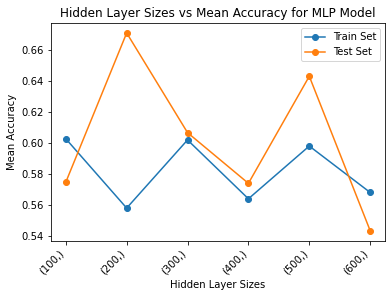

In [40]:
hidden_layer_sizes = [(i,) for i in range(100, 610, 100)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### hidden layer sizes vs. model accuracy (baseline model)  - lower number of layers

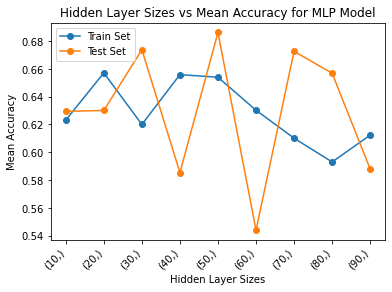

In [41]:
hidden_layer_sizes = [(i,) for i in range(10, 100, 10)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


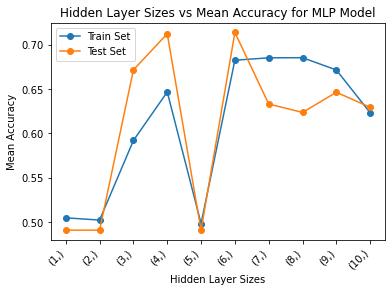

In [42]:
hidden_layer_sizes = [(i,) for i in range(1, 11, 1)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### batch size vs. model accuracies 


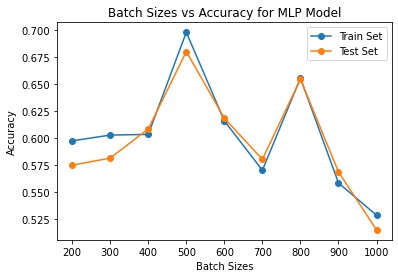

In [43]:
batch_sizes = [200, 300, 400, 500, 600, 700, 800, 900, 1000]

train_accuracies = []
test_accuracies = []

# Train MLP models with different batch sizes
for batch_size in batch_sizes:
    model = MLPClassifier(batch_size=batch_size, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(batch_sizes, train_accuracies, marker='o', label='Train Set')
plt.plot(batch_sizes, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Batch Sizes')
plt.ylabel('Accuracy')
plt.title('Batch Sizes vs Accuracy for MLP Model')
plt.legend()
plt.show()

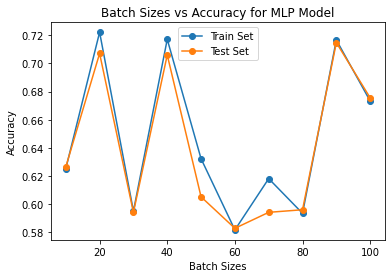

In [44]:
batch_sizes = [i for i in range(10, 110, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different batch sizes
for batch_size in batch_sizes:
    model = MLPClassifier(batch_size=batch_size, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(batch_sizes, train_accuracies, marker='o', label='Train Set')
plt.plot(batch_sizes, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Batch Sizes')
plt.ylabel('Accuracy')
plt.title('Batch Sizes vs Accuracy for MLP Model')
plt.legend()
plt.show()

### max_iter vs. model accuracies (higher iterations) 

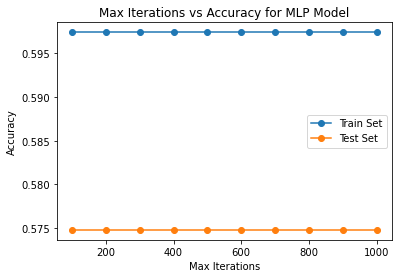

In [45]:
max_iters = [100,200,300,400,500,600,700,800,900,1000]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

### max iter against model accuracies 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


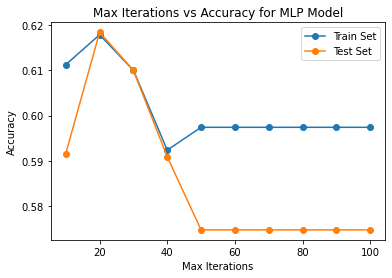

In [46]:
max_iters = [i for i in range(10, 110, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

### alpha (regularisation) vs. models accuracies 

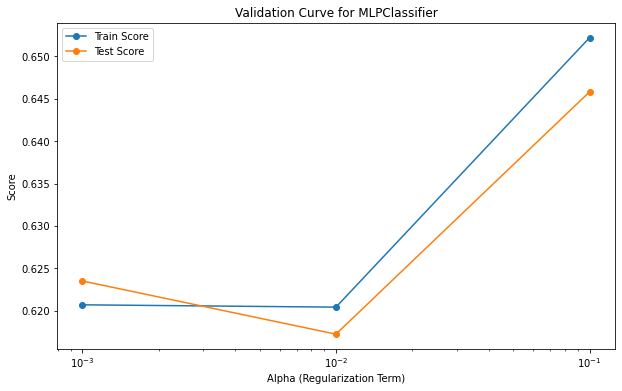

In [47]:
alphas = [0.001, 0.01, 0.1]

train_scores, test_scores = validation_curve(
    mlp, X_train, y_train, param_name="alpha", param_range=alphas, cv=5
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, np.mean(train_scores, axis=1), label="Train Score", marker='o')
plt.plot(alphas, np.mean(test_scores, axis=1), label="Test Score", marker='o')
plt.xscale('log')  # Use this line if you still want the x-axis to be log-scaled
plt.title("Validation Curve for MLPClassifier")
plt.xlabel("Alpha (Regularization Term)")
plt.ylabel("Score")
plt.legend()
plt.show()

### Hyperparameter Tuning using GridSearchCV 

### 1st iteration - lower layer sizes

In [48]:
param_grid = {'hidden_layer_sizes' : [(1,),(4,),(7,),(10,)], # lower layer sizes prevents overfitting as compared to higher sizes
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['lbfgs','adam','sgd'],
              'max_iter':[30,40,50]} # try a lower set of iterations 

In [49]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the numbe

[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.649 total time=   0.1s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.657 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.665 total time=   0.1s
[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.640 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.672 total time=   0.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.496 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_i

[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.496 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't conver

[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.658 total time=   0.1s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.672 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.683 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.678 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.671 total time=   0.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.496 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.496 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the numb

[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.672 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.677 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.671 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.650 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encounte

[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.637 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.496 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_

[CV 4/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.551 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.553 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.558 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.548 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.546 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.705 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.606 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.595 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.702 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.656 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _che

[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.547 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.592 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.586 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.551 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.669 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.675 total time=   0.3s
[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.694 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.601 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.719 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _che

[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.641 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.586 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.671 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.617 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.568 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.669 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.697 total time=   0.4s
[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.694 total time=   0.2s
[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.684 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.678 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs"

[CV 5/5] END activation=identity, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s
[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.617 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.645 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.609 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.621 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.708 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs"

[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.629 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.609 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.684 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.701 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.671 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs"

[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.629 total time=   0.3s
[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.609 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.658 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.621 total time=   0.4s
[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.618 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _che

[CV 5/5] END activation=identity, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.530 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.528 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.548 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.518 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.520 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.581 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.603 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.703 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.629 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.696 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.541 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.534 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.556 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.537 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.539 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.605 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.611 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.604 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.628 total time=   0.3s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.582 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.587 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.598 total time=   0.1s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.559 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.558 total time=   0.1s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.590 total time=   0.1s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.605 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.687 total time=   0.5s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.634 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.628 total time=   0.4s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.582 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _che

[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.670 total time=   0.0s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.639 total time=   0.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.562 total time=   0.0s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.630 total time=   0.0s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=lbfgs;, score=0.631 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.494 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.527 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.674 total time=   0.0s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.698 total time=   0.0s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.683 total time=   0.0s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.628 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.670 total time=   0.0s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.494 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.552 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.505 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.505 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _che

[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.694 total time=   0.0s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.698 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.730 total time=   0.0s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.664 total time=   0.0s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.675 total time=   0.0s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.494 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.504 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.662 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.506 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.505 total time=   0.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.506 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.671 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.560 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.676 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.655 total time=   0.0s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.616 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.496 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.496 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.496 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.508 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.520 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.505 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.505 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.674 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.636 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.672 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.648 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.675 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.496 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.496 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.496 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.506 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.548 total time=   0.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.505 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.505 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.675 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.644 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.672 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.649 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.662 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.496 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.496 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.496 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.506 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.529 total time=   0.5s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.505 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.505 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.506 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.674 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.642 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.661 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.659 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.664 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.570 total time=   0.3s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.511 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.509 total time=   0.3s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.506 total time=   0.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.504 total time=   0.2s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.505 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.505 total time=   0.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.506 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.676 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.643 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.664 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.664 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.670 total time=   0.1s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.598 total time=   0.4s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.511 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.529 total time=   0.3s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.506 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.505 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.505 total time=   0.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.676 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.650 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.665 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.668 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.673 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.575 total time=   0.5s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.511 total time=   0.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.529 total time=   0.3s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.506 total time=   0.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.504 total time=   0.2s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.505 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.505 total time=   0.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(7,), max_iter=

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.556 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.529 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.556 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.672 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.507 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.528 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.570 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.508 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.496 total time=   0.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.505 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.577 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.567 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.672 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.604 total time=   0.2s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.674 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.518 total time=   0.4s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.528 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.535 total time=   0.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.513 total time=   0.3s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.505 total time=   0.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.505 total time=   0.1s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.628 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.558 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.672 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.661 total time=   0.4s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.674 total time=   0.2s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.516 total time=   0.5s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.528 total time=   0.3s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.506 total time=   0.4s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.513 total time=   0.3s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.505 total time=   0.3s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(1

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.496 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.496 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.496 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.496 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.494 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.496 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.496 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.49

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.633 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.621 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.639 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.505 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.496 total time=   0.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.505 total time=   0.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.654 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.628 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.622 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.644 total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.505 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.504 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.511 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.505 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.505 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.504 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.505 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.650 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.672 total time=   0.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.682 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.668 total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.505 total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.504 total time=   0.4s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.496 total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.505 total time=   0.4s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.505 total time=   0.3s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.504 total time=   0.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.504 total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.504 to

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.505 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.505 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=adam;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=30, solver=sgd;, score=0.504 total time=   0.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.505 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.505 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=adam;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=40, solver=sgd;, score=0.504 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.504 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.504 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.505 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.505 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=adam;, score=0.505 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(1,), max_iter=50, solver=sgd;, score=0.504 total time=   0.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.536 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_L

[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.547 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.518 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.689 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.644 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.694 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.689 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=adam;, score=0.668 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=30, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.543 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_L

[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.565 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.536 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.715 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.590 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.723 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.570 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=adam;, score=0.696 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.549 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_L

[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.567 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.567 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.600 total time=   0.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.590 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.690 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.690 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=adam;, score=0.646 total time=   0.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(4,), max_iter=50, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.505 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.518 total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.496 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.646 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.656 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.691 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.614 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=adam;, score=0.680 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.502 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.567 total time=   0.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.536 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=lbfgs;, score=0.504 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.716 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.684 total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.672 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.687 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=adam;, score=0.651 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=40, solver=sgd;, score=0.496 total time=   0.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.498 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.538 total time=   0.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.537 total time=   0.1s
[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=lbfgs;, score=0.504 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.660 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.685 total time=   0.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.672 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.682 total time=   0.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=adam;, score=0.723 total time=   0.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s
[CV 5/5] END activation=relu, hidden_layer_sizes=(7,), max_iter=50, solver=sgd;, score=0.496 total time=   0.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.640 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.600 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.647 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.610 total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.637 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.609 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.660 total time=   0.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.627 total time=   0.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.621 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.701 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.686 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.610 total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.646 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.610 total time=   0.1s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.670 total time=   0.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.615 total time=   0.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.623 total time=   0.6s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.627 total time=   0.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.621 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.677 total time=   0.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.692 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.650 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.705 total time=   0.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.676 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.676 total time=   0.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.615 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.636 total time=   0.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.627 total time=   0.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.621 total time=   0.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.617 total time=   0.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0.496 total time=   0.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), max_iter=50, solver=sgd;, score=0

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [50]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.6920148512650255
{'activation': 'logistic', 'hidden_layer_sizes': (1,), 'max_iter': 50, 'solver': 'lbfgs'}
Elapsed Time: 02:53


In [51]:
mlp2 = MLPClassifier(activation = 'logistic',
                     hidden_layer_sizes=(7,),
                     max_iter=50,
                     solver='lbfgs',
                    random_state=42).fit(X_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model: MLPClassifier(activation='logistic', hidden_layer_sizes=(7,), max_iter=50,
              random_state=42, solver='lbfgs')

Training score: 0.6676618478944061
Testing score: 0.656891495601173

Test Report:
              precision    recall  f1-score   support

           0       0.82      0.42      0.56      1389
           1       0.60      0.90      0.72      1339

    accuracy                           0.66      2728
   macro avg       0.71      0.66      0.64      2728
weighted avg       0.71      0.66      0.64      2728



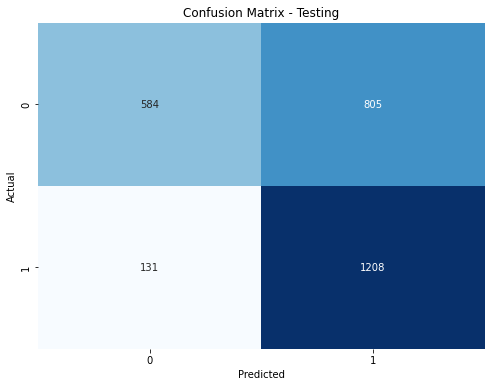

In [52]:
model_scores_classification(mlp2)

# created mlp2 - the scores are not too overfitted
# the score improved, but can stil be improved 

### 2nd iteration - higher layer sizes

In [53]:
param_grid = {'hidden_layer_sizes' : [(10,),(40,),(70,),(100,)], # lower layer sizes prevents overfitting as compared to higher sizes
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['lbfgs','adam','sgd'],
              'max_iter':[30,40,50]} # try a lower set of iterations 

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.530 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.528 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.548 total time=   0.0s
[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.518 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=lbfgs;, score=0.520 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.581 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.603 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.703 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.629 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=adam;, score=0.696 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _che

[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=30, solver=sgd;, score=0.496 total time=   0.2s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.541 total time=   0.0s
[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.534 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.556 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.537 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=lbfgs;, score=0.539 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.605 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.611 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.604 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.628 total time=   0.3s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=adam;, score=0.582 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=40, solver=sgd;, score=0.496 total time=   0.3s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.587 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.598 total time=   0.0s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.559 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.558 total time=   0.0s
[CV 5/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=lbfgs;, score=0.590 total time=   0.0s
[CV 1/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.605 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.687 total time=   0.5s
[CV 3/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.634 total time=   0.4s
[CV 4/5] END activation=identity, hidden_layer_sizes=(10,), max_iter=50, solver=adam;, score=0.628 total time=   0.4s


In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp3= MLPClassifier(activation = 'relu',
                     hidden_layer_sizes=(10,),
                     max_iter=50,
                     solver='adam',
                    random_state=42).fit(X_train,y_train)

In [ ]:
model_scores_classification(mlp3)

# scores went lower, and it is more overfit now 
# issue of overfitting does not exactly relate to layer sizes and iterations 

### 3rd iteration - higher max_iter, and higher layer sizes 
- deviating from our previous approach : we use more iterations and higher layer sizes to let the model learn better 

In [ ]:
param_grid = {'hidden_layer_sizes' : [(100,),(200,),(300,)], 
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['lbfgs','adam','sgd'],
              'max_iter':[100,300,500]} 

In [ ]:
start_time = time.time()

# grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp4 = MLPClassifier(activation = 'tanh',
                     hidden_layer_sizes = (100,),
                     max_iter = 500,
                     solver='lbfgs',
                     random_state=42).fit(X_train,y_train)

In [ ]:
model_scores_classification(mlp4)

# model is not overfitted, train and test scores are close
# find ways to increase the score? 

### 4th iteration - add regularization 

In [ ]:
mlp5 = MLPClassifier(activation = 'tanh',
                     hidden_layer_sizes = (100,),
                     max_iter = 500,
                     solver='lbfgs',
                     random_state=42).fit(X_train,y_train)

In [ ]:
model_scores_classification(mlp5)

### K-folds Cross Validation 

In [ ]:
results  = cross_validate(mlp5, X, y, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

In [ ]:
from sklearn.model_selection import KFold

# Assuming X_train and y_train are your training data
mlp5 = MLPClassifier(activation='tanh',
                     hidden_layer_sizes=(100,),
                     max_iter=500,
                     solver='lbfgs',
                     random_state=42)

# Define the number of folds for cross-validation
k_folds = 5  # You can adjust this value

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(mlp5, X_train, y_train, cv=kf)

# Plot the cross-validated accuracy
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, k_folds + 1), cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validated Accuracy vs. Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, k_folds + 1))
plt.show()

## 2. Airbnb

### 2.1 Load and Sample the data

In [ ]:
df_bnb = pd.read_csv('./bnb_transformed.csv')

In [ ]:
df_bnb.info()

In [ ]:
df_bnb.head()

In [ ]:
df_bnb.isnull().sum()

In [ ]:
df_bnb.describe()

### 2.1.1 Train and Test Splits 

In [ ]:
X = df_bnb.drop(['price'], axis =1)
y = df_bnb['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.2 Build the Model(s)

In [ ]:
models = []

model_names = []

### Linear Regression

In [ ]:
lr = LinearRegression().fit(X_train,y_train)

models.append(lr)
model_names.append('LinearRegression')

### Decision Tree Regressor

In [ ]:
dtr = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

models.append(dtr)
model_names.append('DTree Regressor')

### Random Forest Regressor

In [ ]:
rfr = RandomForestRegressor(random_state=42).fit(X_train, y_train)

models.append(rfr)
model_names.append('Random Forest Regressor')

### SVR 

In [ ]:
svr = SVR().fit(X_train, y_train)

models.append(svr)
model_names.append('SVR')

### ADA Boost

In [ ]:
ada_r = AdaBoostRegressor(random_state=42).fit(X_train, y_train)

models.append(ada_r)
model_names.append('ADA Boost')

### XGB

In [ ]:
xgb_r = XGBRegressor(random_state=42).fit(X_train, y_train)

models.append(xgb_r)
model_names.append('XG Boost')

### MLP Regressor 

In [ ]:
mlp_r = MLPRegressor(random_state=42).fit(X_train,y_train)

models.append(mlp_r)
model_names.append('Multilayer Perceptron')

### 2.3 Evaluate and Improve the Model(s)

In [ ]:
def model_scores_regression(model):
    print(f"Model : {model}:\n")
    # Predictions on the training set
    y_train_pred = model.predict(X_train)
    
    # Predictions on the testing set
    y_test_pred = model.predict(X_test)
    
    # Calculated the RMSE and R^2 for training set
    print(model.score(X_train, y_train), '(Train R^2 Value)')  # R squared value (ranges from 0 to 1): the higher the better
    print(model.score(X_test, y_test), '(Test R^2 Value)')  # R squared value (ranges from 0 to 1): the higher the better
    
    # Create subplot for training set
    plt.figure(figsize=(12, 5))  # Adjust the figure size
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, label='Actual vs. Predicted (Training)')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', label='Ideal Fit')
    plt.xlabel("Actual (Fitted) Values")
    plt.ylabel("Predicted Values")
    plt.title("Training Set: Fitted against Predicted Plot")
    plt.legend()

    # Calculated the RMSE and R^2 for testing set
    print(sqrt(mean_squared_error(y_train_pred, y_train)), '(Train RMSE)')  # RMSE: the lower the better
    print(sqrt(mean_squared_error(y_test_pred, y_test)), '(Test RMSE)')  # RMSE: the lower the better
    
    # Create subplot for testing set
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, label='Actual vs. Predicted (Testing)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Fit')
    plt.xlabel("Actual (Fitted) Values")
    plt.ylabel("Predicted Values")
    plt.title("Testing Set: Fitted against Predicted Plot")
    plt.legend()

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

### 2.3.1 Consolidated View of Model Accuracies 

In [ ]:
results = []

for model, model_name in zip(models, model_names):
    # Fit the model on the training set
    model.fit(X_train, y_train)

    # Calculate metrics
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)

    train_rmse = sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = sqrt(mean_squared_error(y_test, model.predict(X_test)))

    # Append results to the list
    results.append({
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_R2': train_r2,
        'Test_R2': test_r2
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df

### 2.3.2 Choosing Models 
These models will be chosen for further evaluation : <mark>model1</mark>, <mark>model2</mark>,<mark>model3</mark>.

### 2.3.2.1 utilizing statsmodels 